In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [2]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sb
import matplotlib as plt

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1980 - 2014 z rôznych štátov USA
dataset = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
dataset.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [14]:
#
dataset.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [5]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
dataset.shape

(638454, 24)

In [13]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [22]:
dataset["Perpetrator Age"] = pd.to_replace(dataset["Perpetrator Age"], regex = {r'\s': '0'})
dataset["Perpetrator Age"] = pd.to_numeric(dataset["Perpetrator Age"])

AttributeError: module 'pandas' has no attribute 'to_replace'

In [7]:
# skontrolujte, či existujú nulové hodnoty
dataset.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [12]:
dataset['Agency Type'].unique()

array(['Municipal Police', 'County Police', 'State Police', 'Sheriff',
       'Special Police', 'Regional Police', 'Tribal Police'], dtype=object)

In [9]:
dataset['Record Source'].value_counts()

FBI     616647
FOIA     21807
Name: Record Source, dtype: int64

In [10]:
dataset.pivot_table(index = ['Relationship'],aggfunc ='size')

Relationship
Acquaintance            126018
Boyfriend                 7302
Boyfriend/Girlfriend      1383
Brother                   5514
Common-Law Husband        1954
Common-Law Wife           2477
Daughter                  7539
Employee                   384
Employer                   509
Ex-Husband                 629
Ex-Wife                   1973
Family                    9535
Father                    4361
Friend                   21945
Girlfriend               16465
Husband                   8803
In-Law                    3637
Mother                    4248
Neighbor                  6294
Sister                    1292
Son                       9904
Stepdaughter               754
Stepfather                1360
Stepmother                 211
Stepson                   1170
Stranger                 96593
Unknown                 273013
Wife                     23187
dtype: int64

In [11]:
dataset.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [24]:
numerical_cols_dataset = dataset.select_dtypes(['int64','float64','datetime64[ns, UTC]'])
cathegorical_cols_dataset = dataset.select_dtypes(['object'])


array([[<AxesSubplot:title={'center':'Record ID'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Incident'}>,
        <AxesSubplot:title={'center':'Victim Age'}>],
       [<AxesSubplot:title={'center':'Victim Count'}>,
        <AxesSubplot:title={'center':'Perpetrator Count'}>]], dtype=object)

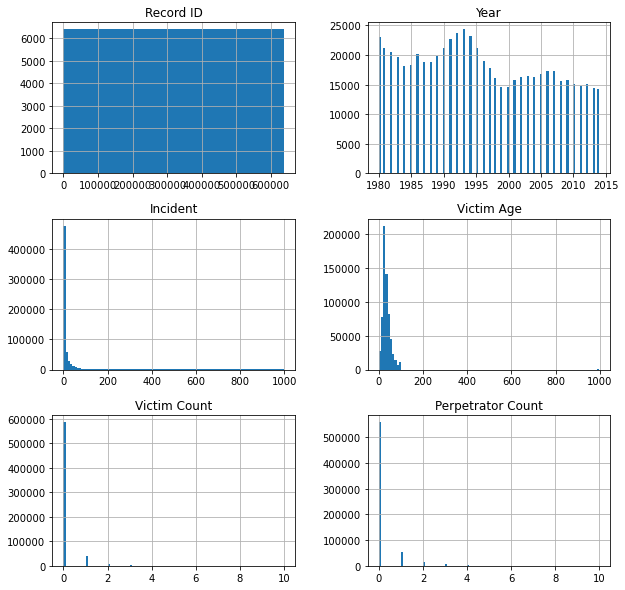

In [27]:
numerical_cols_dataset.hist(figsize = (10,10),bins=100)

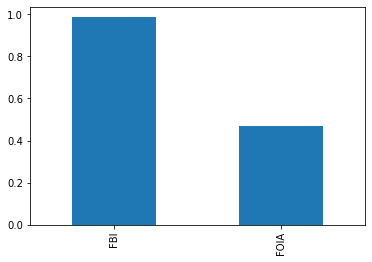

In [30]:
(cathegorical_cols_dataset[col].value_counts()/cathegorical_cols_dataset.shape[0]).plot(kind="bar")

## 2. Pochopenie a Vizualizácia dát